In [73]:
# import libraries
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [74]:
def create_data(m):
    N = 50
    x = torch.randn(N, 1)
    y = m * x + torch.randn(N , 1) / 2

    return x, y

In [75]:
def build_train(x, y, epochs, learning_rate):
    ANNreg = nn.Sequential(
    nn.Linear(1,1),  # input layer
    nn.ReLU(),       # activation function
    nn.Linear(1,1)   # output layer
    )

    # learning rate
    learningRate = learning_rate
    
    # loss function
    lossfun = nn.MSELoss()
    
    # optimizer (the flavor of gradient descent to implement)
    optimizer = torch.optim.SGD(ANNreg.parameters(),lr=learningRate)
    
    # train the model
    numepochs = epochs
    losses = torch.zeros(numepochs)
    
    ## Train the model!
    for epochi in range(numepochs):
    
      # forward pass
      yHat = ANNreg(x)
    
      # compute loss
      loss = lossfun(yHat,y)
      losses[epochi] = loss
    
      # backprop
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

    # show the losses
    
    # manually compute losses
    # final forward pass
    predictions = ANNreg(x)

    return predictions, losses

In [76]:
x,y = create_data(.8)
yHat, losses = build_train(x, y, 500, 0.05)

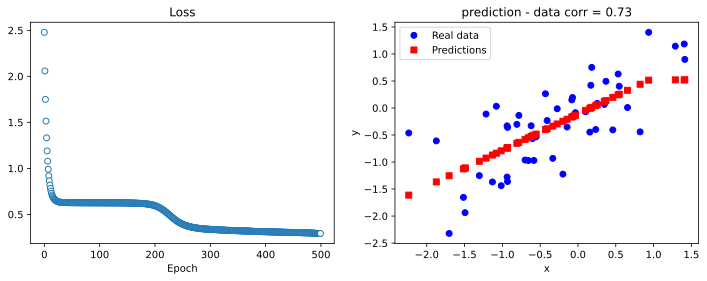

In [77]:
#Plotting
fig, ax = plt.subplots(1,2, figsize=(12,4))
ax[0].plot(losses.detach(),"o", markerfacecolor="w", linewidth=1)
ax[0].set_xlabel("Epoch")
ax[0].set_title("Loss")

ax[1].plot(x,y, "bo", label="Real data")
ax[1].plot(x,yHat.detach(),"rs", label="Predictions")
ax[1].set_xlabel("x")
ax[1].set_ylabel("y")
ax[1].set_title(f"prediction - data corr = {np.corrcoef(y.T, yHat.detach().T)[0,1]:.2f}")
ax[1].legend()

plt.show()

In [ ]:
# (takes 3 mins with 21 slopes and 50 exps)

# the slopes to simulate
slopes = np.linspace(-2,2,21)
numExps = 50

# initialize output matrix
results = np.zeros((len(slopes),numExps,2))

for slopei in range(len(slopes)):

  for N in range(numExps):

    # create a dataset and run the model
    x,y = create_data(slopes[slopei])
    yHat,losses = build_train(x,y,500,0.05)
    yHat = yHat.detach()

    # store the final loss and performance
    results[slopei,N,0] = losses[-1]
    results[slopei,N,1] = np.corrcoef(y.T,yHat.detach().T)[0,1]


# correlation can be 0 if the model didn't do well. Set nan's->0
results[np.isnan(results)] = 0

[-2.  -1.8 -1.6 -1.4 -1.2 -1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6
  0.8  1.   1.2  1.4  1.6  1.8  2. ]


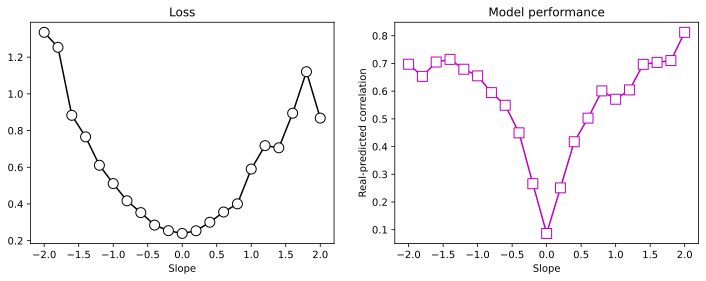

In [82]:
# plot the results!

fig,ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(slopes,np.mean(results[:,:,0],axis=1),'ko-',markerfacecolor='w',markersize=10)
ax[0].set_xlabel('Slope')
ax[0].set_title('Loss')

ax[1].plot(slopes,np.mean(results[:,:,1],axis=1),'ms-',markerfacecolor='w',markersize=10)
ax[1].set_xlabel('Slope')
ax[1].set_ylabel('Real-predicted correlation')
ax[1].set_title('Model performance')

plt.show()

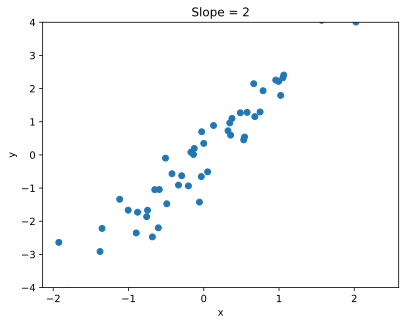

In [84]:
# extra code to visualize data with different slopes

m = 2

x,y = create_data(m)

plt.title('Slope = ' + str(m))
plt.plot(x,y,'o')
plt.ylim([-4,4])
plt.xlabel('x')
plt.ylabel('y')
plt.show()